## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 2


Assignment 2 is worth 15% of the final grade. Submit the ipynb file and a generated output file (PDF or HTML). Failing to submit both files will be subject to a mark deduction.

Your output file should include all the tables, plots, and requested figures/values.

Printing the lengthy outputs (e.g., the whole data frame or a list with more than 100 elements) will have a deduction of 5 points. Instead, please use head() or tail() to have a neat output.

If you preprocess the data in a question, you should continue with the same dataset in the following questions unless otherwise mentioned.


### Preparation:

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Import the following files:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv    
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


### Question 1



1) Read the white wine as a pandas dataframe and name it wine_data_white. **Display the first 3 rows of wine_data_white.**
<br>
2) Read the red wine as a pandas dataframe and name it wine_data_red. **Display the first 3 rows of wine_data_red.**
<br>
3) Join the wine_data_red and wine_data_white datasets by adding the rows of one to the other. Name the joined dataframe wine_data. **Display the total number of rows and columns in the wine_data dataframe.**


The following questions will be evaluated for wine_data. (2 points)



In [7]:
import pandas as pd

In [44]:

# Reading the white wine data 
wine_data_white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')
# Displaying the first 3 rows
print(wine_data_white.head(n=3))
# Reading the red wine data 
wine_data_red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

# Displaying the first 3 rows 
print(wine_data_red.head(n=3))

#Joining the two datasets
wine_data = pd.concat([wine_data_white, wine_data_red], ignore_index = True)
#printnig the total rows and columns
print(f"Total rows and columns are {wine_data.shape} respectively")

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3     

### Question 2
Check the data types of the attributes. (2 points)

In [45]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### Question 3
Are there any missing values in the dataset? How many? You should not print the whole dataset. (2 points)

In [46]:
Missing = wine_data.isnull().sum().sum()
print("Total missing values in the dataset are: ", Missing)

Total missing values in the dataset are:  0


### Question 4

Ignoring the quality column (a categorical column), display the pearson correlation between all the attributes? (8 points)

In [47]:
#Creating a new dataset without the quality column
Data = wine_data.drop('quality', axis = 1)
print("Correlation matrix: \n")

#Printing pearson correlation between all the attributes
print(Data.corr())

Correlation matrix: 

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282

### Question 5
Using 'quality' attribute, do the following: <br>
* Display the different values of wine quality. How many levels of wine quality are in this dataset?
<br>
* Plot the frequency distribution of wine quality by using the Quality attribute.
<br>
(8 points)

Different values of wine quality:  [6 5 7 8 4 3 9]
Number levels of wine quality:  7


<AxesSubplot:xlabel='quality', ylabel='Count'>

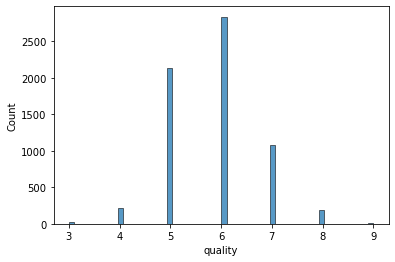

In [62]:
import seaborn as sns

Wine_quality = wine_data.quality.unique()
Length = len(Wine_quality)

print("Different values of wine quality: ", Wine_quality)
print("Number levels of wine quality: ", Length)


sns.histplot(data = wine_data, x = 'quality')

### Question 6

We want to create a new column called 'quality_new' to group these 7 levels of quality ratings and reduce them to two distinguishable levels. (10 points)

1) Create the new_quality variable as per the conditions above.
<br>
2) How many wines pass the quality test and how many fail? Display the total count of wines having a 0 quality rating level and those having a 1 quality rating level.
<br>
3) Drop the 'quality' column from the wine_data. We will be using 'quality_new' going forward.


- **Condition** We assume levels :
    - 3, 4, and 5 to be bad grade wine level. We replace any of those quality level numbers to 0 ('Fail')
    - 6, 7, 8, 9 to be good grade wine level. We replace any of those quality level numbers to 1 ('Pass')

In [76]:


print(fail_count)

2384


In [77]:
# Create the new_quality variable
wine_data['new_quality'] = wine_data['quality'].apply(lambda x:0 if x in [3, 4, 5] else 1)
# Count the number of wines that pass and fail the quality test
quality_counts = wine_data['new_quality'].value_counts()
fail_count = quality_counts.get(0, 0)
pass_count = quality_counts.get(1, 0)

print("Wines that fail: ", fail_count)
print("Wines that passed: ", pass_count)

#Drop the quality variable
wine_data = wine_data.drop('quality', axis = 1)


Wines that fail:  2384
Wines that passed:  4113


### Question 7
Normalize the numeric attributes using the following normalization using the following method: (x - min(x)) / (max(x) - min(x)).
<br>
**Display the first 3 rows and last 3 rows of your final output.** (10 points)

* *Hint/Optional*
    * First create a new dataframe with only numeric variables (remove 'quality_new'). Call it wine_data_num.
    * Then apply normalization on wine_data_num.
    * Then ensure to join 'quality_new' column from the original wine_data dataframe to the normalized data.
    * To ensure ensure code readability best practices, ensure your final normalized data that includes quality_new variable is called : 'wine_data_normalized'

In [84]:
#Dropping the quality_new
wine_data_num = wine_data.drop(columns = ['new_quality'])

#Normalization
wine_data_num = (wine_data_num - wine_data_num.min()) / (wine_data_num.max() - wine_data_num.min())

#Joining the new_quality variable to the normalized data
wine_data_normalized = wine_data_num.join(wine_data['new_quality'])

#Displaying the first 3 rows and last 3 rows of your final output.

print("First 3 rows:")
print(wine_data_normalized.head(3))

print("\nLast 3 rows:")
print(wine_data_normalized.tail(3))


First 3 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.264463          0.126667     0.216867        0.308282   0.059801   
1       0.206612          0.146667     0.204819        0.015337   0.066445   
2       0.355372          0.133333     0.240964        0.096626   0.068106   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.152778              0.377880  0.267785  0.217054   0.129213   
1             0.045139              0.290323  0.132832  0.449612   0.151685   
2             0.100694              0.209677  0.154039  0.418605   0.123596   

    alcohol  new_quality  
0  0.115942            1  
1  0.217391            1  
2  0.304348            1  

Last 3 rows:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6494       0.206612          0.286667     0.078313        0.026074   0.111296   
6495       0.173554          0.376667     0.072289        0.021472   0.1

- ## <font color='blue' size="4">**Read Instructions Below Prior to Proceeding with Next Questions**</font>
    * From this Question onwards, we are using the **<u>"data_wine_normalized"<u>**. *Optional: you are free to drop any other wine_data you've created along the way only if you want to.*
    * <font color='blue'>**Objective<u>**</font> :
**Our goal is to build two binary classification models to predict whether wine passes or fails the quality rating level, and evaluate their performance**
    


### Question 8
Divide the dataset to training and test sets. (10 points)

In [86]:
from sklearn.model_selection import train_test_split
X = wine_data_normalized.drop(columns = ['new_quality'])
Y = wine_data_normalized['new_quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Question 9
Use the Logistic Regression algorithm to predict the quality of wine (quality_new) using its attributes. (12 points)

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)
Y_reg_logreg = logreg.predict(X_test)

### Question 10
Use the KNN algorithm to predict the quality of wine (quality_new) using its attributes. (12 points)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_knn_predict = knn.predict(X_test)

### Question 11
Display two confusion matrices to evaluate the performances of Logistic Regression and KNN. (A simple matrix is enough. No need to plot it.) (12 points)

In [92]:
from sklearn.metrics import confusion_matrix
# Confusion matrices
conf_matrix_logreg = confusion_matrix(Y_test, Y_reg_logreg)
conf_matrix_knn = confusion_matrix(Y_test, Y_knn_predict)

print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logreg)

print("\nConfusion Matrix for KNN:")
print(conf_matrix_knn)

Confusion Matrix for Logistic Regression:
[[272 196]
 [139 693]]

Confusion Matrix for KNN:
[[307 161]
 [136 696]]


### Question 12
Evaluate the models’ performances by computing Accuracy, Precision, and Recall. <br>
For each performance metric write <font color='red'> **only one sentence** </font> to explain what the number means, assuming you are presenting to non-technical audience.(12 points)


In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [97]:
# Evaluate models
accuracy_logreg = accuracy_score(Y_test, Y_reg_logreg)
precision_logreg = precision_score(Y_test, Y_reg_logreg)
recall_logreg = recall_score(Y_test, Y_reg_logreg)

accuracy_knn = accuracy_score(Y_test, Y_knn_predict)
precision_knn = precision_score(Y_test, Y_knn_predict)
recall_knn = recall_score(Y_test, Y_knn_predict)

# Print performance metrics
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print("Accuracy: The model was able to correctly classify 74% of the wine samples out of all samples.")
print(f"Precision: {precision_logreg:.2f}")
print("Precision: The model correctly classified 78% of the good quality wines out of all wines classified as good quality")
print(f"Recall: {recall_logreg:.2f}")
print("Recall: The model correctly classified 83% of the good quality wines out of all actual good quality wines.")

print("\nKNN Performance:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Accuracy: The model was able to correctly classify 77% of the wine samples out of all samples.")
print(f"Precision: {precision_knn:.2f}")
print("Precision: The model correctly classified 81% of the good quality wines out of all wines classified as good quality")
print(f"Recall: {recall_knn:.2f}")
print("Recall: The model correctly classified 84% of the good quality wines out of all actual good quality wines.")





Logistic Regression Performance:
Accuracy: 0.74
Accuracy: The model was able to correctly classify 74% of the wine samples out of all samples.
Precision: 0.78
Precision: The model correctly classified 78% of the good quality wines out of all wines classified as good quality
Recall: 0.83
Recall: The model correctly classified 83% of the good quality wines out of all actual good quality wines.

KNN Performance:
Accuracy: 0.77
Accuracy: The model was able to correctly classify 77% of the wine samples out of all samples.
Precision: 0.81
Precision: The model correctly classified 81% of the good quality wines out of all wines classified as good quality
Recall: 0.84
Recall: The model correctly classified 84% of the good quality wines out of all actual good quality wines.
